# Thank the author!
<a href="https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python">COMPREHENSIVE DATA EXPLORATION WITH PYTHON</a>
<br>
<< <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques#tutorials">Getting started with Python</a>
<br>

1. 問題の理解(Understand the problem.)
    - 各変数を見て、問題（課題）に対するデータの意味と重要性を分析
2. 単変量解析(Univariable study)
    - 従属変数（目的変数）にファーカスして詳細を調べてみる
3. 多変量解析(Multivairable study)
    - 従属変数と独立変数の関係性を調べてみる。
4. データ整理(Basic cleaning)
    - データの整理や欠損値・はずれ値・カテゴリー変数の処理
5. 評価(Test assumptions)
    - 多変量解析によって得れれた予測と実際のデータがあっているかどうかの確認

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# bring the train data
df_train = pd.read_csv("../input/train.csv")

In [4]:
# check the tag
print(df_train.columns.shape)

print(df_train.columns)

(81,)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pave

### 変数
kaggleのCompetitionページの説明
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. 目標
分析に何らかの教育性をもたせるために以下のようなカラムを持ったcsvファイルを生成することを目標とする
- Variable : 変数名
- Type : 変数の型を示す。”数値”, ”クラスラベル（文字列）”
- Segment : 
- Expectation : 
- Conclusion : 
- Comments : 
"Type" と "Segment"は後学のためのものに過ぎないが、"Expectation"はとても重要である。なぜなら、それは私達の第六感（直感）を鍛え上げるからである。
これらの項目を記述するためにすべての変数の説明をひとつひとつ詳細によみ、以下のことを自問するのがよい。
- 我々が家を買おうというときに、これらの変数を考慮するか？
- そうであったなら、その変数はどの程度重要なのか？
- この情報が他の変数によって既に説明済みかどうか？
この困難を乗り越えれば、そのスプレッドシートから重要な情報を取り出し、高い精度の予測と共にその変数を注視することができるようになる。
それから、それらの変数と販売価格をプロットして、予測を補正した結論を書き込む。


\[今回は筆者の既に目星をつけてくれた\]  
"I went through this process and concluded that the following variables can play an important role in this problem:"
- "OverallQual" : この値はどのように算出されているかがわからないため好まない。他の変数を使ってこの値を予測するのもおもしろい。
- "YearBuilt"
- "TotalBsmtSF"
- "GrLivArea"
<br>
<br>
- OverallQual: Overall material and finish quality
- YearBuilt: Original construction date
- TotalBsmtSF: Total square feet of basement area
- GrLivArea: Above grade (ground) living area square feet

建物に関する変数が２つ  
スペースに関する変数が２つ  

不動産に関するマントラである"Location, location and loacation"に反するので少し予想外に思われたかもしれない。  
https://www.thebalance.com/what-location-means-in-real-estate-1798766

# 2. First things first : analyzing 'SalePrice'


In [8]:
# statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

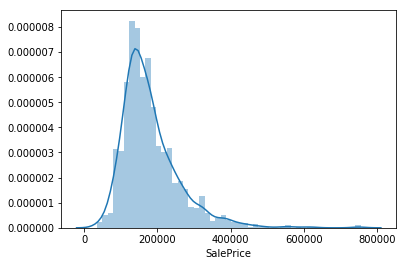

In [12]:
sns.distplot(df_train['SalePrice'])